In [3]:

import pandas
import matplotlib.pyplot as plt
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


Using TensorFlow backend.


NameError: name 'python' is not defined

In [57]:
dataset = pandas.read_csv('D:/sp500.csv', usecols=[0], engine='python', skipfooter=3)
plt.plot(dataset)
plt.show()
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
3
4
5
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

2791 1376


In [58]:

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

2791 1376


In [59]:
print(dataset)

[[ 0.48240909]
 [ 0.48420417]
 [ 0.48509838]
 ..., 
 [ 0.99562893]
 [ 0.99609603]
 [ 0.99436106]]


In [60]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [61]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [62]:
trainX.shape

(2789, 1)

In [63]:
print(trainX.shape)

(2789, 1)


In [64]:

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [65]:

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
7s - loss: 0.0116
Epoch 2/100
6s - loss: 1.5458e-04
Epoch 3/100
6s - loss: 1.3052e-04
Epoch 4/100
6s - loss: 1.2160e-04
Epoch 5/100
6s - loss: 1.1664e-04
Epoch 6/100
6s - loss: 1.1482e-04
Epoch 7/100
6s - loss: 1.1412e-04
Epoch 8/100
6s - loss: 1.1329e-04
Epoch 9/100
7s - loss: 1.1333e-04
Epoch 10/100
6s - loss: 1.1356e-04
Epoch 11/100
6s - loss: 1.1144e-04
Epoch 12/100


KeyboardInterrupt: 

In [66]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 15.14 RMSE
Test Score: 51.16 RMSE


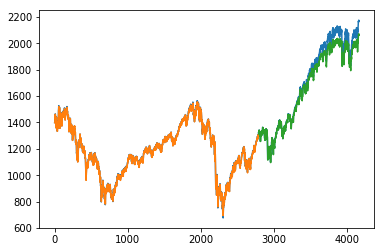

In [67]:

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataframe)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+ts_lag, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataframe)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(ts_lag*2)+1:len(dataframe)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataframe))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [30]:
p = np.empty_like(dataset)


In [40]:
p[:, :].shape

(144, 1)

In [38]:
p[look_back:len(trainPredict)+look_back, :].shape

(94, 1)

In [42]:
trainPredict.shape

(94, 1)

In [ ]:
# rescale predicted values
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# plot baseline and predictions
pylab.plot(trainPredictPlot)
pylab.plot(testPredictPlot)
pylab.show()
